# Words per Prediction

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('../data/preprocessed_train.csv')
df.fillna('', inplace = True)
print(df.head(5))

       Id  Prediction                        Summary  \
0  492346           5             just what i needed   
1  343811           5         most excellent oatmeal   
2  347257           4                    quality tea   
3  225529           5  great coffee at a great price   
4  485488           4       popchips jalapeno flavor   

                                                Text  
0  i got them in a very timely manner and theyre ...  
1  mccanns steel cut oatmeal is the perfect break...  
2  i would recommend it quality pearls and a few ...  
3  i have to admit i first purchased these hazeln...  
4  i bought a case of jalapeno chips as i love th...  


In [25]:
def text_per_prediction(df):
    df['Text'] = df['Summary'] + ' ' + df['Text']
    return df.groupby('Prediction')['Text'].apply(lambda x: ' '.join(x)).reset_index()

In [26]:
df = text_per_prediction(df)
print(df.head(5))

   Prediction                                               Text
0           1  sugar bomb  same amount of sugar as a  oz coke...
1           2  way too expensive like the product but come on...
2           3  its ok maybe its due to my tendency to prefer ...
3           4  quality tea i would recommend it quality pearl...
4           5  just what i needed i got them in a very timely...


In [28]:
df.to_csv("../data/wpp_train.csv", index = False)

---

# Word dictionary

In [41]:
word_frec = {}

for i, row in df.iterrows():
    word_frec[row['Prediction']] = {}
    for word in row['Text'].split():
        word_frec[row['Prediction']][word] = word_frec[row['Prediction']].get(word, 0) + 1

In [42]:
# (◔ ⌣ ◔)
print(word_frec[1]['diarrea'])

4


---

# Word cloud

In [61]:
from wordcloud import WordCloud

### Minimal cloud

In [62]:
# Generate a word cloud image for prediction 1
wordcloud = WordCloud(background_color = 'white').generate(df.Text[0])

In [63]:
# Display the generated image:
# the Pillow way:
image = wordcloud.to_image()
image.show()

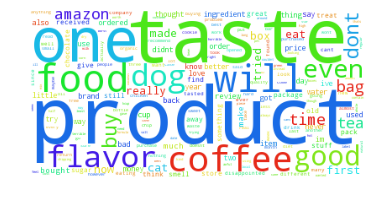

In [64]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

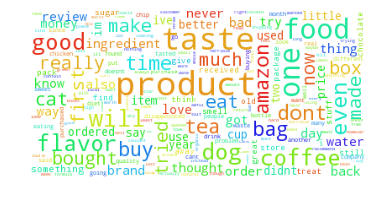

In [65]:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color = 'white', max_font_size=40, relative_scaling=.5).generate(df.Text[0])
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Masked cloud

In [66]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [67]:
one_mask = np.array(Image.open('masks/one.jpg'))
stopwords = set(STOPWORDS)
masked_wordcloud = WordCloud(background_color = 'white', max_words = 2000, mask = one_mask, stopwords = stopwords)

In [68]:
masked_wordcloud.generate(df.Text[0])

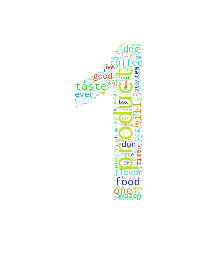

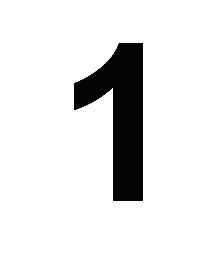

In [69]:
# Display
plt.imshow(masked_wordcloud)
plt.axis('off')
plt.figure()
plt.imshow(one_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [70]:
# Save to file
masked_wordcloud.to_file('clouds/one_cloud.png')

### Colored cloud

In [57]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [58]:
five_mask = imread('masks/five.jpg')
green_cloud = WordCloud(background_color='white', max_words = 2000, mask = five_mask, stopwords = STOPWORDS, max_font_size = 40, random_state = 42)
# generate word cloud
green_cloud.generate(df.Text[4])

In [59]:
# create coloring from image
green_coloring = imread('masks/greens.png')
image_colors = ImageColorGenerator(green_coloring)

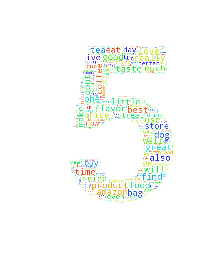

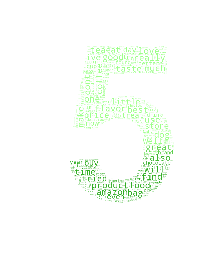

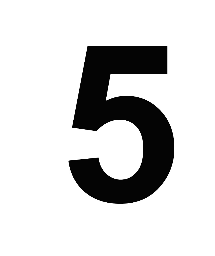

In [60]:
# show
plt.imshow(green_cloud)
plt.axis("off")
plt.figure()

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(green_cloud.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()

plt.imshow(five_mask, cmap=plt.cm.gray)
plt.axis("off")

plt.show()

---

## Final clouds

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

one_mask = np.array(Image.open('masks/one.jpg'))
two_mask = np.array(Image.open('masks/two.jpg'))
three_mask = np.array(Image.open('masks/three.jpg'))
four_mask = np.array(Image.open('masks/four.jpg'))
five_mask = np.array(Image.open('masks/five.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('product')

masked_wordcloud = WordCloud(background_color = 'white', relative_scaling=.5, mask = one_mask, stopwords = stopwords)
masked_wordcloud.generate(df.Text[0])
masked_wordcloud.to_file('clouds/one_cloud_scaled.png')

masked_wordcloud = WordCloud(background_color = 'white', relative_scaling=.5, mask = two_mask, stopwords = stopwords)
masked_wordcloud.generate(df.Text[1])
masked_wordcloud.to_file('clouds/two_cloud_scaled.png')

masked_wordcloud = WordCloud(background_color = 'white', relative_scaling=.5, mask = three_mask, stopwords = stopwords)
masked_wordcloud.generate(df.Text[2])
masked_wordcloud.to_file('clouds/three_cloud_scaled.png')

masked_wordcloud = WordCloud(background_color = 'white', relative_scaling=.5, mask = four_mask, stopwords = stopwords)
masked_wordcloud.generate(df.Text[3])
masked_wordcloud.to_file('clouds/four_cloud_scaled.png')

masked_wordcloud = WordCloud(background_color = 'white', relative_scaling=.5, mask = five_mask, stopwords = stopwords)
masked_wordcloud.generate(df.Text[4])
masked_wordcloud.to_file('clouds/five_cloud_scaled.png')

Tienen todas las mismas palabras, fail :c